In [3]:
import pandas_datareader.data as web
import pandas as pd

df_kospi = web.DataReader('^KS11', 'yahoo', start='2004-01-04')
df_dj = web.DataReader('^DJI', 'yahoo', start='2004-01-04')

# 코스피와 다운지수를 하나의 표에 넣기 위하여 지수화(특정일의 지수로 나눔)한다.
s1_kospi = (df_kospi.Close / df_kospi.Close.loc['2004-01-05']) * 100
s1_dj = (df_dj.Close / df_dj.Close.loc['2004-01-05']) * 100

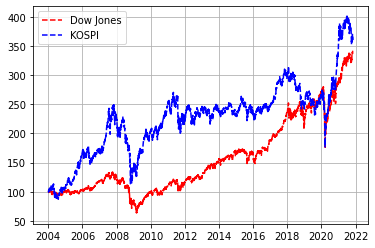

In [4]:
import matplotlib.pyplot as plt
# plt.figure(figsize=(9,5))
plt.plot(s1_dj.index, s1_dj, 'r--', label = 'Dow Jones')
plt.plot(s1_kospi.index, s1_kospi, 'b--', label = 'KOSPI')
plt.grid(True)
plt.legend(loc='best')
plt.show()


In [8]:
# Missing값 (NaN) 값을 없애기 위하여 fillna 메서드를 이용한다.

import pandas_datareader.data as web
import pandas as pd

df_kospi = web.DataReader('^KS11', 'yahoo', start='2004-01-04')
df_dj = web.DataReader('^DJI', 'yahoo', start='2004-01-04')

df = pd.DataFrame({'DowJones':df_dj.Close, 'KOSPI':df_kospi.Close})
df = df.fillna(method='bfill')  # 나중값으로 앞에 값을 메운다
df = df.fillna(method='ffill')  # 이전값으로 나중값을 메운다.
df.tail()


,DowJones,KOSPI
Date,,
2021-10-28,35730.480469,3009.550049
2021-10-29,35819.558594,2970.679932
2021-11-01,35913.839844,2978.939941
2021-11-02,36052.628906,3013.489990
2021-11-03,36052.628906,2977.090088


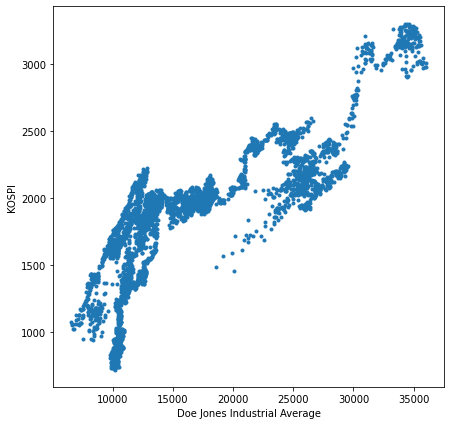

In [9]:
# scatter 매서드로 산점도 를 그릴수 있다..plt.plot 으로도 그릴 수 있다.
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
plt.scatter(df.DowJones,df.KOSPI, marker = '.')
plt.xlabel('Doe Jones Industrial Average')
plt.ylabel('KOSPI')
plt.show()

In [11]:
# scipy 내에 stats 서브패키지의 기능을 이용하여 선형회귀분석 결과를 구할수있다.
from scipy import stats
repr = stats.linregress(df.DowJones,df.KOSPI)
print(type(repr))
repr

<class 'scipy.stats._stats_mstats_common.LinregressResult'>


LinregressResult(slope=0.061497455229134725, intercept=835.1078050357822, rvalue=0.8242667242155046, pvalue=0.0, stderr=0.0006213632694416979, intercept_stderr=11.185762329340271)

In [12]:
df.corr()  # stats 패키지를 이용하지 않고 데이터프레임내에서도 전체 시리즈에 대하여 상관계수를 구할 수 있다.


,DowJones,KOSPI
DowJones,1.000000,0.824267
KOSPI,0.824267,1.000000


In [14]:
# 시리즈를 선택해서 상관계수 구하기
# 상관계수 r을 제곱하면 결정계수를 구할수 있다.
r = df.DowJones.corr(df.KOSPI)  
r_squared = r**2  
print(f'상관계수={r}, 결정계수= {r_squared}')

상관계수=0.8242667242155044, 결정계수= 0.6794156326489584


- 결정계수는 추정한 회귀선이 데이터를 얼마나 정확하게 설명하고 있는가로 나타내는 지표
- 1이면 회귀선에 모든 측정치가 존재한다는 의미, 0이면 추정된  회귀선이 변수간 관계를 전혀 설명하지 못한다는 의미

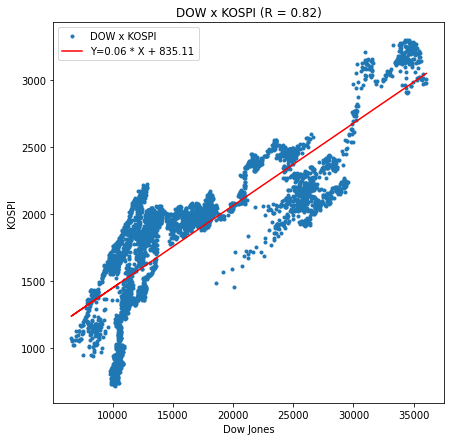

In [20]:
# 산점도 위에 회귀직선을 같이 그려 넣어본다.

import pandas_datareader.data as web
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

df_kospi = web.DataReader('^KS11', 'yahoo', start='2004-01-04')
df_dj = web.DataReader('^DJI', 'yahoo', start='2004-01-04')

df = pd.DataFrame({'X':df_dj.Close, 'Y':df_kospi.Close})
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')  # 하나의 NaN 만 있어도 밑에 회귀분석결과가 나오지 않는다.

repr = stats.linregress(df.X,df.Y)
regr_line = f'Y={repr.slope:.2f} * X + {repr.intercept:.2f}'

plt.figure(figsize=(7,7))
plt.plot(df.X,df.Y,'.')
plt.plot(df.X,repr.slope * df.X + repr.intercept,'r')
plt.legend(['DOW x KOSPI', regr_line])
plt.title(f'DOW x KOSPI (R = {repr.rvalue:.2f})')
plt.xlabel('Dow Jones')
plt.ylabel('KOSPI')
plt.show()

